<a href="https://colab.research.google.com/github/Zh5rakib/data-science-portfolio/blob/main/04-iris-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette per k: {2: np.float64(0.582), 3: np.float64(0.46), 4: np.float64(0.387), 5: np.float64(0.346), 6: np.float64(0.317)}
Best k: 2 (score=0.582)


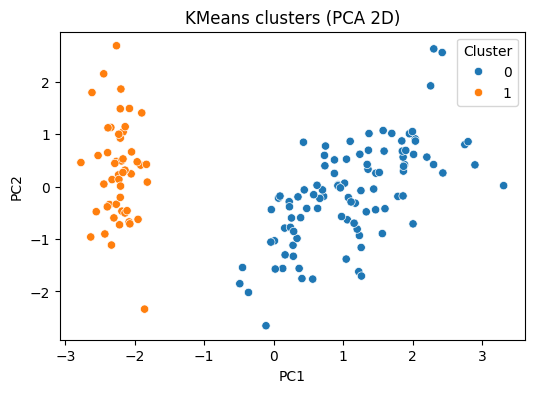


Cluster vs true species:
true_species   0   1   2
cluster                 
0              0  50  50
1             50   0   0


In [1]:
# Project 4: Unsupervised — KMeans Clustering (Iris)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris(as_frame=True)
X = iris.frame.drop(columns=["target"])
y = iris.frame["target"]  # only for reference

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k, best_score, best_model = None, -1, None
scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    if score > best_score:
        best_k, best_score, best_model = k, score, km

print("Silhouette per k:", {k: round(v, 3) for k, v in scores.items()})
print(f"Best k: {best_k} (score={best_score:.3f})")

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
labels = best_model.predict(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette="tab10")
plt.title("KMeans clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

ct = pd.crosstab(pd.Series(labels, name="cluster"), pd.Series(y, name="true_species"))
print("\nCluster vs true species:")
print(ct)